In [1]:
# ================================================================= #
# Tahap 1: Upload dataset
# ================================================================= #

import pandas as pd
import io
from google.colab import files

uploaded = files.upload()

print("\nMembaca file yang diunggah...")

# Membaca setiap file yang diunggah ke dalam DataFrame terpisah
try:
    df_fisik = pd.read_csv(io.BytesIO(uploaded['data_fisik_lokasi_demak.csv']))
    print("-> Berhasil memuat: 'data_fisik_lokasi_demak.csv'")
except KeyError:
    print("-> Gagal memuat: 'data_fisik_lokasi_demak.csv'. Pastikan nama file benar dan terunggah.")
    df_fisik = pd.DataFrame() # Buat DataFrame kosong jika gagal

try:
    df_lahan = pd.read_csv(io.BytesIO(uploaded['data_penggunaan_lahan_demak.csv']))
    print("-> Berhasil memuat: 'data_penggunaan_lahan_demak.csv'")
except KeyError:
    print("-> Gagal memuat: 'data_penggunaan_lahan_demak.csv'. Pastikan nama file benar dan terunggah.")
    df_lahan = pd.DataFrame() # Buat DataFrame kosong jika gagal

try:
    df_hujan = pd.read_csv(io.BytesIO(uploaded['data_curah_hujan_demak.csv']))
    print("-> Berhasil memuat: 'data_curah_hujan_demak.csv'")
except KeyError:
    print("-> Gagal memuat: 'data_curah_hujan_demak.csv'. Pastikan nama file benar dan terunggah.")
    df_hujan = pd.DataFrame() # Buat DataFrame kosong jika gagal

try:
    df_historis = pd.read_csv(io.BytesIO(uploaded['data_historis_banjir_demak.csv']))
    print("-> Berhasil memuat: 'data_historis_banjir_demak.csv'")
except KeyError:
    print("-> Gagal memuat: 'data_historis_banjir_demak.csv'. Pastikan nama file benar dan terunggah.")
    df_historis = pd.DataFrame() # Buat DataFrame kosong jika gagal


print("\n✅ Proses pemuatan file selesai.")

# Menampilkan 5 baris pertama dari setiap DataFrame untuk verifikasi (hanya jika DataFrame tidak kosong)
if not df_fisik.empty:
    print("\n--- Data Fisik Lokasi ---")
    print(df_fisik.head())
else:
    print("\n--- Data Fisik Lokasi ---")
    print("DataFrame kosong atau gagal dimuat.")

if not df_lahan.empty:
    print("\n--- Data Penggunaan Lahan ---")
    print(df_lahan.head())
else:
    print("\n--- Data Penggunaan Lahan ---")
    print("DataFrame kosong atau gagal dimuat.")

if not df_hujan.empty:
    print("\n--- Data Curah Hujan ---")
    print(df_hujan.head())
else:
    print("\n--- Data Curah Hujan ---")
    print("DataFrame kosong atau gagal dimuat.")

if not df_historis.empty:
    print("\n--- Data Historis Banjir ---")
    print(df_historis.head())
else:
    print("\n--- Data Historis Banjir ---")
    print("DataFrame kosong atau gagal dimuat.")

Saving data_curah_hujan_demak.csv to data_curah_hujan_demak.csv
Saving data_fisik_lokasi_demak.csv to data_fisik_lokasi_demak.csv
Saving data_historis_banjir_demak.csv to data_historis_banjir_demak.csv
Saving data_penggunaan_lahan_demak.csv to data_penggunaan_lahan_demak.csv

Membaca file yang diunggah...
-> Berhasil memuat: 'data_fisik_lokasi_demak.csv'
-> Berhasil memuat: 'data_penggunaan_lahan_demak.csv'
-> Berhasil memuat: 'data_curah_hujan_demak.csv'
-> Berhasil memuat: 'data_historis_banjir_demak.csv'

✅ Proses pemuatan file selesai.

--- Data Fisik Lokasi ---
   lokasi_id  latitude   longitude  ketinggian_m  kemiringan_derajat
0          0 -6.874908  110.546283            28                   7
1          1 -6.990143  110.635475             7                  15
2          2 -6.946399  110.718236            35                   4
3          3 -6.919732  110.683056            28                   2
4          4 -6.831204  110.701640            14                  11

--- Data Pen

In [2]:
# ================================================================= #
# Tahap 2: Pre-processing
# ================================================================= #

print("🔄 Memulai proses integrasi data...")

# Langkah 1: Menggabungkan data fisik, lahan, dan hujan berdasarkan 'lokasi_id'
data_utama = pd.merge(df_fisik, df_lahan, on='lokasi_id')
data_utama = pd.merge(data_utama, df_hujan, on='lokasi_id')
print("-> Data fisik, lahan, dan hujan berhasil digabungkan.")

# Langkah 2: Membuat kolom target 'status_banjir'
df_historis['lat_round'] = df_historis['latitude'].round(5)
df_historis['lon_round'] = df_historis['longitude'].round(5)
data_utama['lat_round'] = data_utama['latitude'].round(5)
data_utama['lon_round'] = data_utama['longitude'].round(5)

data_final = pd.merge(data_utama, df_historis[['lat_round', 'lon_round', 'kejadian_banjir']],
                      on=['lat_round', 'lon_round'],
                      how='left')

# Lokasi yang tidak ada di data historis akan memiliki nilai NaN (Not a Number).
# NaN diganti dengan 0 (artinya tidak tercatat ada banjir).
data_final['status_banjir'] = data_final['kejadian_banjir'].fillna(0).astype(int)
print("-> Kolom target 'status_banjir' berhasil dibuat dari data historis.")

# Langkah 3: Encoding data kategorikal 'penggunaan_lahan'
data_final = pd.get_dummies(data_final, columns=['penggunaan_lahan'], prefix='lahan')
print("-> Data kategorikal 'penggunaan_lahan' telah di-encode.")

# Langkah 4: Membersihkan kolom-kolom yang tidak diperlukan lagi
kolom_final = [col for col in data_final.columns if col not in [
    'lokasi_id', 'kejadian_banjir', 'lat_round', 'lon_round'
]]
data_final = data_final[kolom_final]

print("\n✅ Preprocessing selesai!")
print("Dataset final siap untuk ditraining:")
print(data_final.head())
print("\nDistribusi kelas target:")
print(data_final['status_banjir'].value_counts())

🔄 Memulai proses integrasi data...
-> Data fisik, lahan, dan hujan berhasil digabungkan.
-> Kolom target 'status_banjir' berhasil dibuat dari data historis.
-> Data kategorikal 'penggunaan_lahan' telah di-encode.

✅ Preprocessing selesai!
Dataset final siap untuk ditraining:
   latitude   longitude  ketinggian_m  kemiringan_derajat  \
0 -6.874908  110.546283            28                   7   
1 -6.990143  110.635475             7                  15   
2 -6.946399  110.718236            35                   4   
3 -6.919732  110.683056            28                   2   
4 -6.831204  110.701640            14                  11   

   rata_curah_hujan_mm  status_banjir  lahan_Industri  lahan_Lahan Terbuka  \
0                 1882              0           False                False   
1                 3756              1           False                False   
2                 2912              0           False                False   
3                 3083              0        

 Memulai pelatihan model...

✅ Model berhasil dilatih!

📊 Mengevaluasi kinerja pada data test...

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       160
           1       0.95      0.88      0.91        40

    accuracy                           0.96       200
   macro avg       0.96      0.93      0.94       200
weighted avg       0.96      0.96      0.96       200

Confusion Matrix:


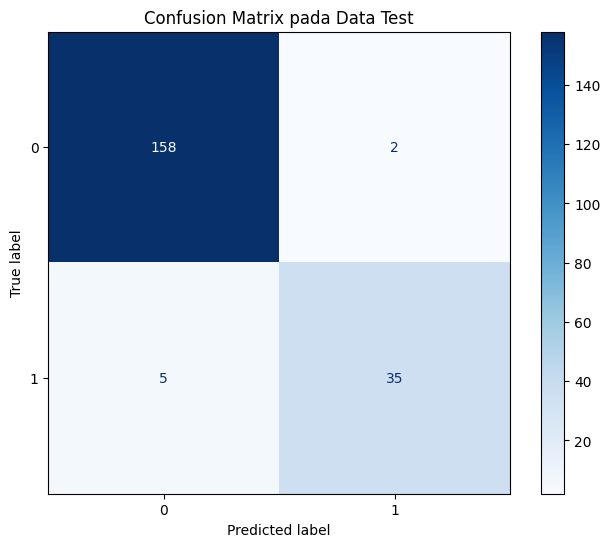

In [3]:
# ================================================================= #
# Tahap 3: Training Model (RANDOM FOREST)
# ================================================================= #
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(" Memulai pelatihan model...")

# Definisikan fitur (X) dan target (y)
# Fitur adalah semua kolom kecuali koordinat dan target
fitur = [col for col in data_final.columns if col not in ['latitude', 'longitude', 'status_banjir']]
X = data_final[fitur]
y = data_final['status_banjir']

# Splitting data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Training model Random Forest
model_rf = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced', max_depth=10)
model_rf.fit(X_train, y_train)

print("\n✅ Model berhasil dilatih!")

# --- Evaluasi Kinerja Model ---
print("\n📊 Mengevaluasi kinerja pada data test...")
y_pred = model_rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test, cmap='Blues', ax=ax)
plt.title('Confusion Matrix pada Data Test')
plt.show()

🔍 Menganalisis fitur yang paling berpengaruh terhadap prediksi banjir...


<ipython-input-4-16ebec62bcbf>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tingkat Kepentingan', y='Fitur', data=feature_importance_df, palette='viridis')


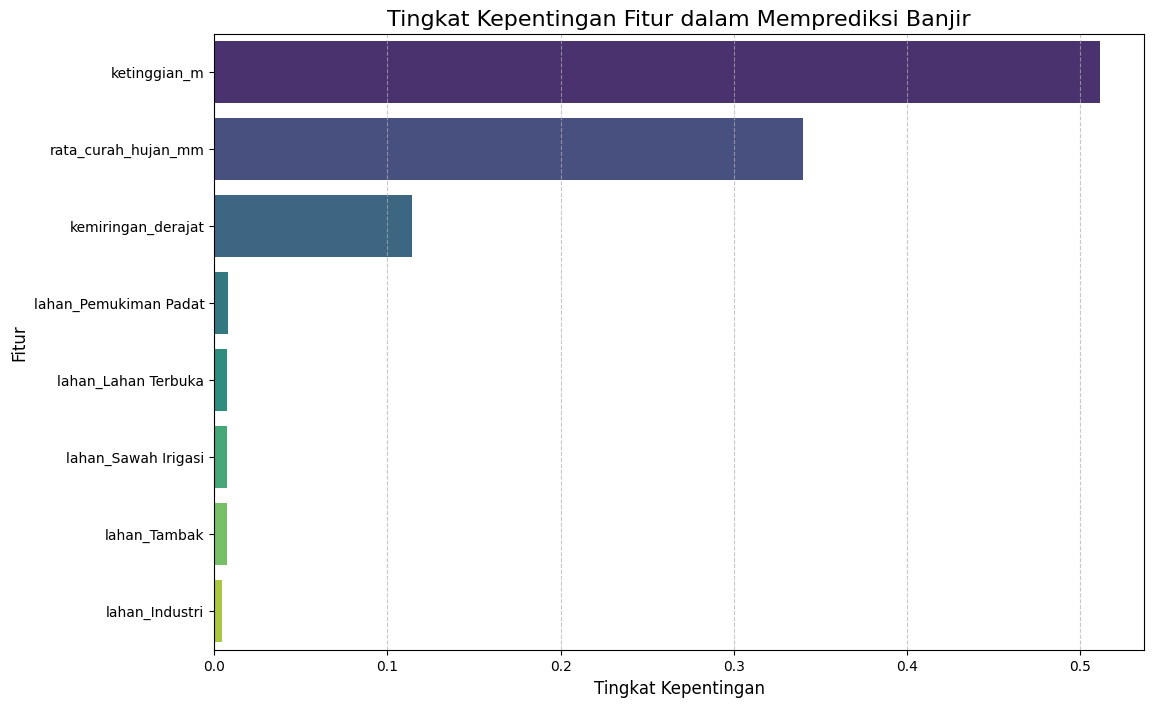


Fitur paling berpengaruh teratas:
                   Fitur  Tingkat Kepentingan
0           ketinggian_m             0.511266
2    rata_curah_hujan_mm             0.339946
1     kemiringan_derajat             0.114030
5  lahan_Pemukiman Padat             0.008086
4    lahan_Lahan Terbuka             0.007483


In [4]:
# ================================================================= #
# Tahap 4: Analisis Faktor Paling Berpengaruh
# ================================================================= #

print("🔍 Menganalisis fitur yang paling berpengaruh terhadap prediksi banjir...")

# Ambil nilai pentingnya fitur dari model
importances = model_rf.feature_importances_
feature_names = X.columns

# Buat DataFrame untuk visualisasi
feature_importance_df = pd.DataFrame({'Fitur': feature_names, 'Tingkat Kepentingan': importances})
feature_importance_df = feature_importance_df.sort_values(by='Tingkat Kepentingan', ascending=False)

# Visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(x='Tingkat Kepentingan', y='Fitur', data=feature_importance_df, palette='viridis')
plt.title('Tingkat Kepentingan Fitur dalam Memprediksi Banjir', fontsize=16)
plt.xlabel('Tingkat Kepentingan', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("\nFitur paling berpengaruh teratas:")
print(feature_importance_df.head(5))

🗺️ Membuat Peta Prediksi Kerawanan Banjir untuk seluruh wilayah Demak...


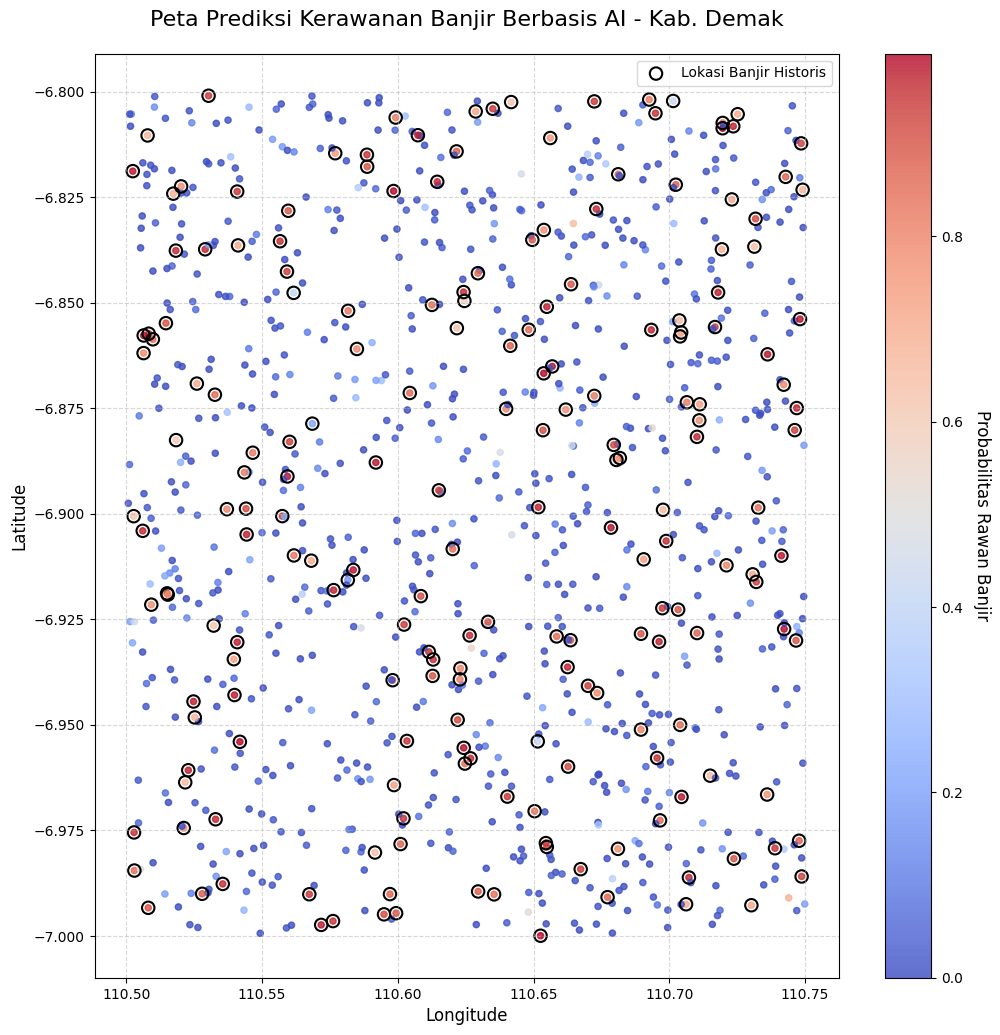


✅ Peta Prediksi Kerawanan Banjir telah berhasil dibuat.
Warna merah menunjukkan probabilitas rawan banjir yang tinggi, sedangkan biru rendah.


In [5]:
# ================================================================= #
# Tahap 5: Visualisasi Peta
# ================================================================= #

print("🗺️ Membuat Peta Prediksi Kerawanan Banjir untuk seluruh wilayah Demak...")

# probabilitas_banjir berisi probabilitas untuk kelas '1' (Banjir)
probabilitas_banjir = model_rf.predict_proba(X)[:, 1]

# Menambahkan hasil prediksi probabilitas ke DataFrame utama
data_final['probabilitas_banjir'] = probabilitas_banjir

# --- Membuat Peta Visual ---
plt.figure(figsize=(12, 12))

# Menggunakan scatter plot dengan warna berdasarkan probabilitas
scatter = plt.scatter(
    data_final['longitude'],
    data_final['latitude'],
    c=data_final['probabilitas_banjir'],
    cmap='coolwarm', # Peta warna: biru (rendah) ke merah (tinggi)
    s=20, # Ukuran titik
    alpha=0.8
)

# Menambahkan colorbar, judul dan label
cbar = plt.colorbar(scatter)
cbar.set_label('Probabilitas Rawan Banjir', rotation=270, labelpad=20, fontsize=12)

plt.title('Peta Prediksi Kerawanan Banjir Berbasis AI - Kab. Demak', fontsize=16, pad=20)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Menandai lokasi banjir historis untuk validasi visual
plt.scatter(
    df_historis['longitude'],
    df_historis['latitude'],
    facecolors='none', # Hanya pinggiran
    edgecolors='black',
    s=80, # Ukuran lebih besar
    linewidth=1.5,
    label='Lokasi Banjir Historis'
)
plt.legend()

plt.show()

print("\n✅ Peta Prediksi Kerawanan Banjir telah berhasil dibuat.")
print("Warna merah menunjukkan probabilitas rawan banjir yang tinggi, sedangkan biru rendah.")

In [6]:
# ================================================================= #
# Tahap 6: Menyimpan Peta ke HTML
# ================================================================= #

import folium
from folium.plugins import MarkerCluster

# 1. Siapkan data dengan menggabungkan probabilitas ke data asli (sebelum encoding)
# Ini agar kita bisa menampilkan info 'penggunaan_lahan' yang asli di popup
data_peta = data_utama.join(data_final['probabilitas_banjir'])


# 2. Membuat peta dasar yang berpusat di wilayah Demak
peta_interaktif = folium.Map(
    location=[data_peta['latitude'].mean(), data_peta['longitude'].mean()],
    zoom_start=11,
    tiles='CartoDB positron'
)

# 3. Fungsi untuk menentukan warna marker berdasarkan probabilitas
def get_color(probability):
    """Memberikan kode warna berdasarkan tingkat probabilitas."""
    if probability > 0.75:
        return 'darkred'
    elif probability > 0.60:
        return 'red'
    elif probability > 0.45:
        return 'orange'
    elif probability > 0.30:
        return 'lightgreen'
    else:
        return 'green'

# 4. Menambahkan setiap titik data ke peta sebagai marker lingkaran
marker_cluster = MarkerCluster().add_to(peta_interaktif)

for idx, row in data_peta.iterrows():
    popup_html = f"""
    <b>Info Lokasi</b><br>
    -----------------------------------<br>
    <b>Probabilitas Banjir:</b> {row['probabilitas_banjir']:.2%}<br>
    <b>Penggunaan Lahan:</b> {row['penggunaan_lahan']}<br>
    <b>Ketinggian:</b> {row['ketinggian_m']} m<br>
    <b>Kemiringan:</b> {row['kemiringan_derajat']}°<br>
    <b>Curah Hujan Tahunan:</b> {row['rata_curah_hujan_mm']} mm
    """

    # iframe untuk menampung konten popup
    iframe = folium.IFrame(popup_html, width=250, height=150)
    popup = folium.Popup(iframe, max_width=250)

    # Menambahkan marker ke cluster
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=get_color(row['probabilitas_banjir']),
        fill=True,
        fill_color=get_color(row['probabilitas_banjir']),
        fill_opacity=0.7,
        popup=popup
    ).add_to(marker_cluster)

# Menambahkan kontrol layer untuk bisa menonaktifkan tile
folium.LayerControl().add_to(peta_interaktif)


# 5. Menyimpan peta sebagai file HTML
nama_file_html = 'peta_prediksi_banjir_demak.html'
peta_interaktif.save(nama_file_html)

print(f"\n✅ Peta berhasil disimpan sebagai '{nama_file_html}'")

# 6. Mengunduh file HTML
from google.colab import files
files.download(nama_file_html)


✅ Peta berhasil disimpan sebagai 'peta_prediksi_banjir_demak.html'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>